In [1]:
import pandas as pd
from bunkatech.semantics.bourdieu import Bourdieu
import bamboolib
pd.options.mode.chained_assignment = None

import numpy as np
import random

data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

In [2]:
bourdieu = Bourdieu(data = data, text_var = 'description', index_var = 'imdb')

In [3]:
bourdieu.fit(extract_terms = True,
            docs_embedding = False, 
            terms_embedding = True, 
            sample_size_terms = 3000, 
            terms_limit =3000,
            terms_ents = False,
            terms_ngrams = (2,2),
            terms_ncs = False,
            language = 'en')

Extract Terms: 100%|███████████████████████| 3000/3000 [00:29<00:00, 101.03it/s]


Batches:   0%|          | 0/94 [00:00<?, ?it/s]

In [4]:
# Origami
# get the paper with the holistic information: you have a general view on everything, you can explore and zoom on
# genral topics
# fold the paper accoridng to dimensions that are yours

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

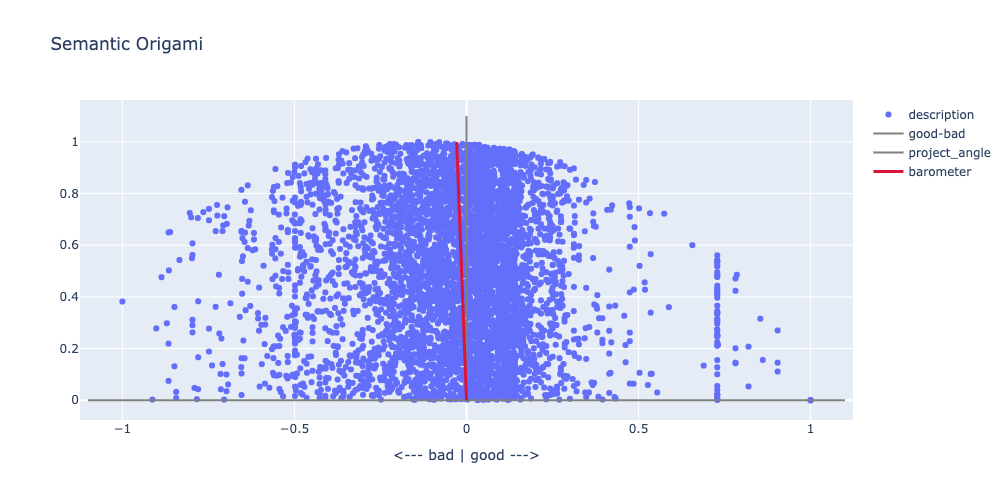

In [14]:
# Create a way to enter different words
bourdieu.bourdieu_projection_unique(projection_1 = ['good', 'bad'], 
                                    type = 'documents', 
                                    height = 500, 
                                    width = 1000, 
                                    dispersion = True,
                                    barometer = True)


In [12]:
max(bourdieu.df_fig['project_angle'])

0.9997355623408666

In [6]:
bourdieu.bourdieu_projection(projection_1 = ['man', 'woman'], 
                             projection_2 =  ['the past', 'the future'], 
                             type = 'documents', 
                             height = 1000, 
                             width = 1000)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
df = bourdieu.terms_embeddings
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
projection_2 = None

if projection_2 is None:

    projection_1 = ['future', 'past']
    projection_str_1 = "-".join(projection_1)


    df_bert = bourdieu.compute_projection_embeddings(projection_1)
    df_proj = df_bert[projection_1]

    df_proj[projection_str_1] = df_proj[projection_1[0]] - df_proj[projection_1[1]]

    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj["term"] = df_proj.index


    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj[projection_str_1] = scaler.fit_transform(
        df_proj[projection_str_1].values.reshape(-1, 1)
    )
    
df_proj['project_angle'] = np.sqrt(1-df_proj[projection_str_1]**2) # Pythagore
df_proj['project_angle_random'] = df_proj['project_angle'].apply(lambda x: np.sqrt(1-x**2)*(1+random.random()*0.1))
df_proj['project_angle_random'] = df_proj['project_angle'].apply(lambda x:x*random.uniform(0, 1))

#df_proj['project_angle_random'] = df_proj['project_angle'].apply(lambda x: x*random.uniform(0, 1))

fig = go.Figure()

trace_1 = go.Scatter(
    x=[-1.0, 1.0],
    y=[0, 0],
    mode="lines",
    line_color="grey")


trace_2 = go.Scatter(
    x=[0, 0],
    y=[0, 1.0],
    mode="lines",
    line_color="grey")

trace_scatter_random = go.Scatter(
    x=df_proj[projection_str_1],
    y=df_proj['project_angle_random'],
    text = df_proj['term'],
    mode="markers",
    name = 'projection_random')

'''
trace_scatter = go.Scatter(
    x=df_proj[projection_str_1],
    y=df_proj['project_angle'],
    text = df_proj['term'],
    mode="markers",
    name = 'projection')
fig.add_trace(trace_scatter)

'''
# Get the barometer

baro_mean = df_proj[projection_str_1].mean()
baro_mean_angle =  np.sqrt(1-baro_mean**2)

trace_barometer = go.Scatter(
        x=[0.0, baro_mean, None],
        y=[0.0, baro_mean_angle, None],
        mode="lines",
        line_width = 3,
        line_color = 'royalblue',
        name = 'barometer')

fig.add_trace(trace_scatter_random)
fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_barometer)



fig.update_layout(
        title='Semantic PCA',
        height=500,
        width=1000,
        xaxis_title="<--- " + " | ".join(reversed(projection_1)) + " --->",
    )

fig.show()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
2**3

8

In [22]:
 df_proj[projection_str_1]

new york         -0.155047
high school      -0.344438
young woman      -0.236750
young man        -0.260264
world war        -0.129923
                    ...   
triangle forms   -0.166219
future            0.741022
past             -1.000000
woman            -0.307677
man              -0.356220
Name: future-past, Length: 3004, dtype: float32

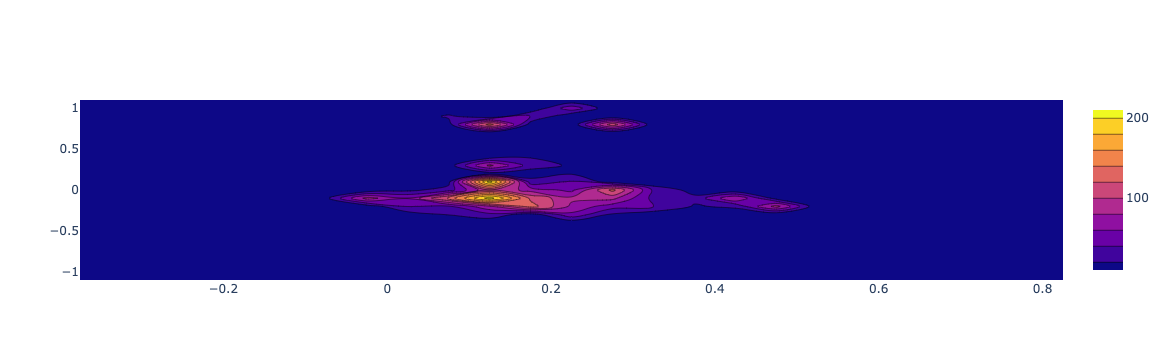

In [28]:
fig = go.Figure()


main_trace = go.Histogram2dContour(
        x = test["praise-criticism"],
        y = test["young-old"]
)

fig.add_trace(main_trace)


fig.show()